In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('./diabetes.csv')

In [5]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [7]:
#missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [31]:
#replace zeros with mean for selected columns 
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan)
    data[column].fillna(round(data[column].mean(skipna=True)))

In [33]:
#features and target
X = data.iloc[:, :8]
Y = data['Outcome']

In [35]:
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 5.2. Fit the scaler on the training data ONLY, and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 5.3. Transform the test data using the fitted scaler (prevents data leakage)
X_test_scaled = scaler.transform(X_test)

In [51]:
#initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [53]:
#predictions
knn_pred = knn.predict(X_test_scaled)

In [55]:
#metrics
cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
f1 = f1_score(Y_test, knn_pred)

#display results
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",accuracy)
print("Error Rate:",error_rate)
print("Precision Score:",precision)
print("Recall Score:",recall)
print("F1 Score:",f1)

Confusion Matrix:
 [[88 19]
 [18 29]]
Accuracy Score: 0.7597402597402597
Error Rate: 0.24025974025974028
Precision Score: 0.6041666666666666
Recall Score: 0.6170212765957447
F1 Score: 0.6105263157894737


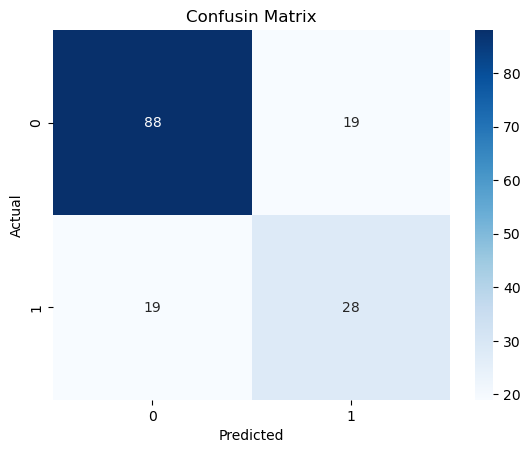

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusin Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

TN FP
FN TP